In [32]:
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [33]:
data = load_penguins()
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [34]:
X, y = data.drop(columns=['species']), data['species']
X.head(10)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [35]:
y.head(10)

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
5    Adelie
6    Adelie
7    Adelie
8    Adelie
9    Adelie
Name: species, dtype: object

In [36]:
y.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

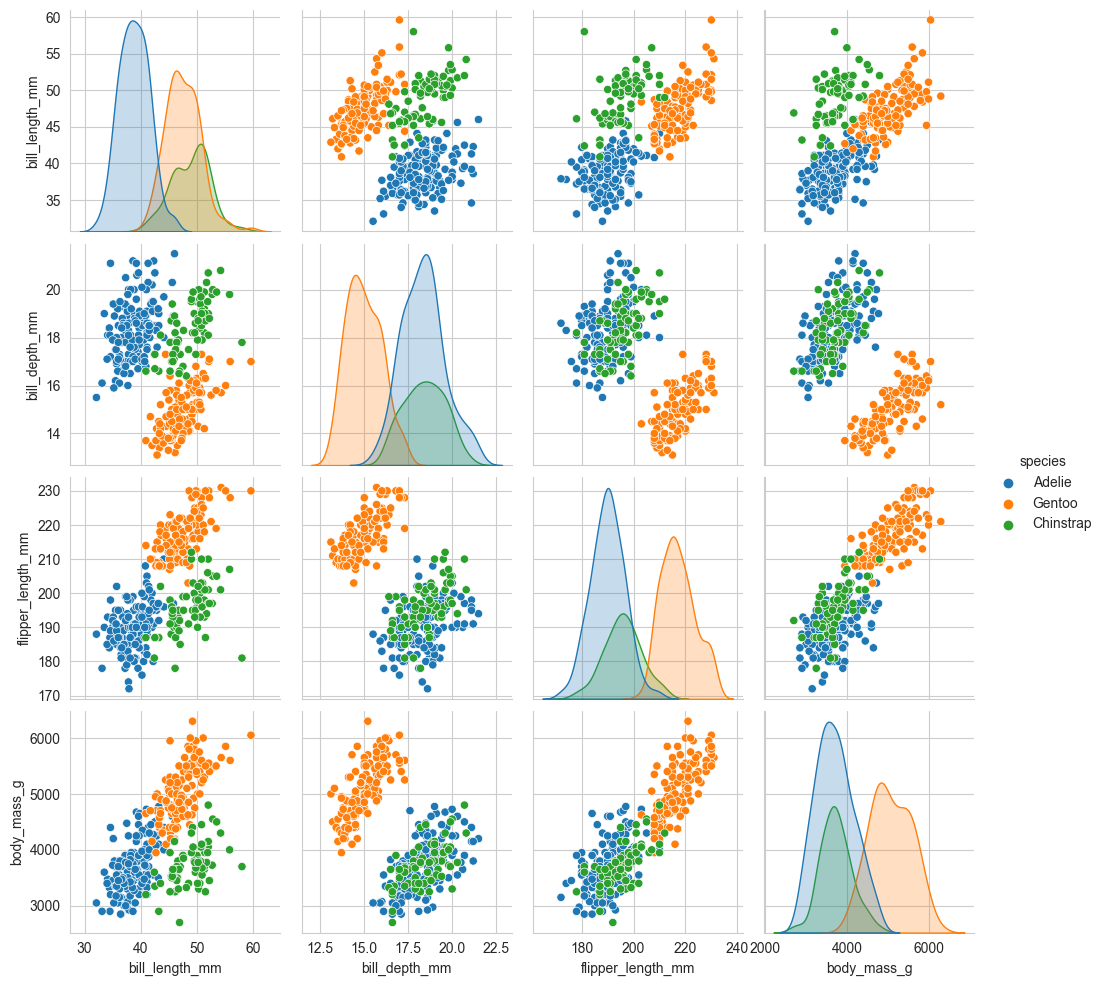

In [37]:
sns.pairplot(data.drop(columns='year'), hue='species')
plt.show()

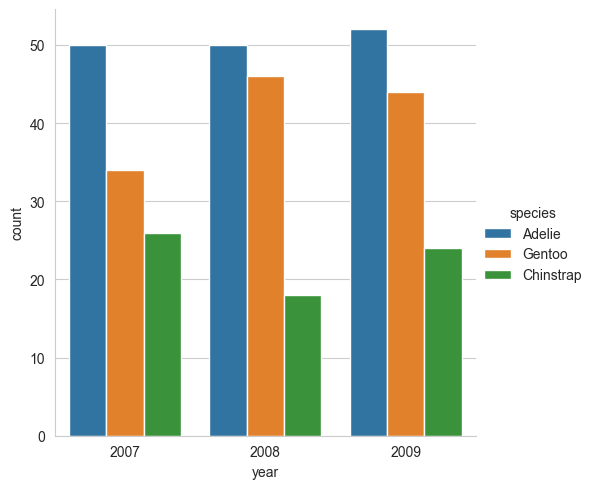

In [38]:
sns.catplot(data=data, x='year', kind='count', hue='species')
plt.show()

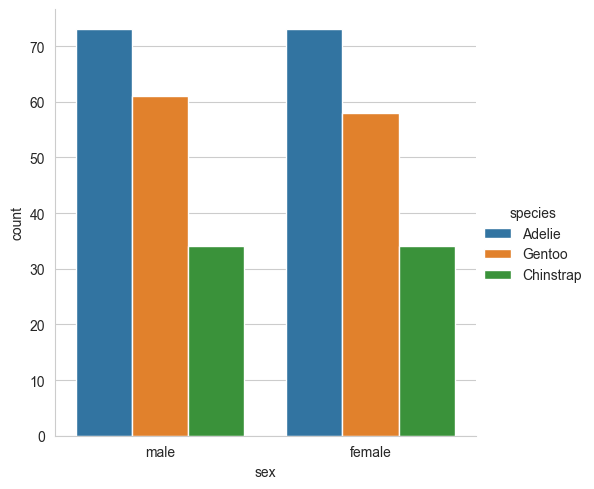

In [39]:
sns.catplot(data=data, x='sex', kind='count', hue='species')
plt.show()

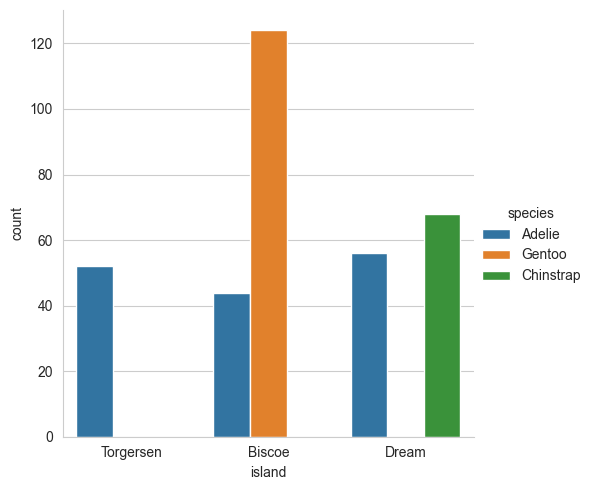

In [40]:
sns.catplot(data=data, x='island', kind='count', hue='species')
plt.show()

In [41]:
data.drop(columns=['year', 'sex', 'island'], inplace=True)
data.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
6,Adelie,38.9,17.8,181.0,3625.0
7,Adelie,39.2,19.6,195.0,4675.0
8,Adelie,34.1,18.1,193.0,3475.0
9,Adelie,42.0,20.2,190.0,4250.0


In [42]:
data.dropna(inplace=True)
data.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
6,Adelie,38.9,17.8,181.0,3625.0
7,Adelie,39.2,19.6,195.0,4675.0
8,Adelie,34.1,18.1,193.0,3475.0
9,Adelie,42.0,20.2,190.0,4250.0
10,Adelie,37.8,17.1,186.0,3300.0


In [43]:
# вещественные колонки:
# - bill_length_mm        длина клюва пингвина в мм
# - bill_depth_mm         высота клюва пингвина в мм
# - flipper_length_mm     длина плавника пингвина в мм
# - body_mass_g           масса тела пингвина в граммах

# целочисленные колонки:
# - year                  год проведения исследования: 2007, 2008 и 2009

# категориальные колонки:
# - species               биологический вид пингвина: пингвин Адели, cубантарктический пингвин и антарктический пингвин
# - island                остров, на котором пингвин был исследован: Торгерсен, Биско и Дрим
# - sex                   пол пингвина: муж, жен и неопределённый

In [44]:
X, y = data.drop(columns='species'), data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
min_samples_split_list = [2, 5, 10]
n_estimators_list = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
min_samples_leaf_list = [1, 2, 4]

param_grid = {
    'min_samples_split': min_samples_split_list,
    'n_estimators': n_estimators_list,
    'min_samples_leaf': min_samples_leaf_list
}

# create and train grid search
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
gs.fit(X, y)

best_params = gs.best_params_
best_score = gs.best_score_
print('best parameters:', best_params)
print('best score:', best_score)

best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best score: 0.9794970161977835


In [46]:
cv_results = gs.cv_results_
results = pd.DataFrame(cv_results['params'])
results['score'] = cv_results['mean_test_score']
results.head(10)

,min_samples_leaf,min_samples_split,n_estimators,score
0,1,2,200,0.979497
1,1,2,400,0.976598
2,1,2,600,0.976598
3,1,2,800,0.976598
4,1,2,1000,0.979497
5,1,2,1200,0.979497
6,1,2,1400,0.979497
7,1,2,1600,0.979497
8,1,2,1800,0.979497
9,1,2,2000,0.979497


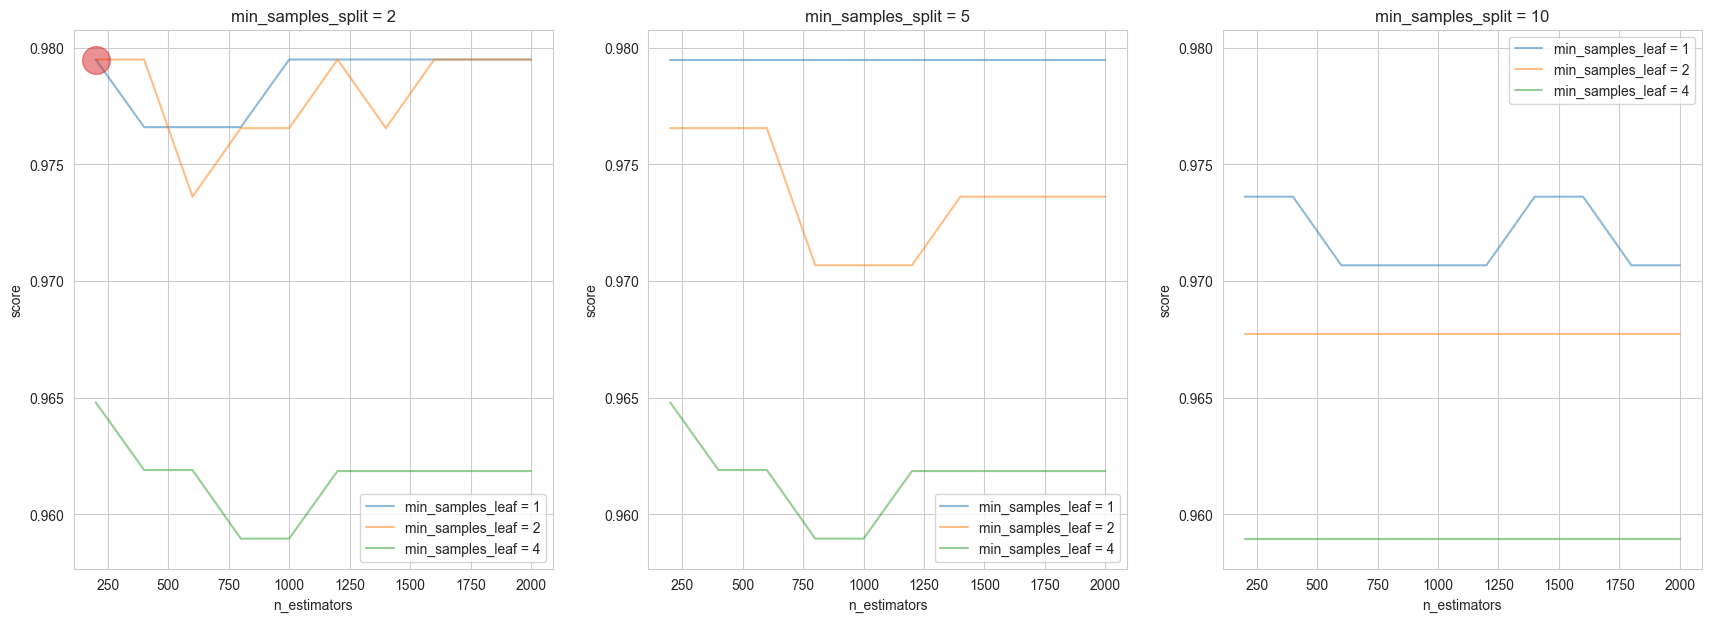

In [49]:
params = gs.cv_results_['params']
scores = gs.cv_results_['mean_test_score']

min_score = results['score'].min()
max_score = results['score'].max()
margin = (max_score - min_score) / 16

n_cols = min(len(min_samples_split_list), 3)
n_rows = math.ceil(len(min_samples_split_list) / n_cols)
plt.figure(figsize=(7*n_cols,7*n_rows))
for i, min_samples_split in enumerate(min_samples_split_list):
    plt.subplot(n_rows, n_cols, i+1)
    for min_samples_leaf in min_samples_leaf_list:
        plot_data = results[(results['min_samples_leaf']==min_samples_leaf) & (results['min_samples_split']==min_samples_split)]
        plt.plot(plot_data['n_estimators'], plot_data['score'], label='min_samples_leaf = ' + str(min_samples_leaf), alpha=.5)
    if best_params['min_samples_split'] == min_samples_split:
        plt.plot(best_params['n_estimators'], best_score, 'o', ms=20, alpha=.5)
    plt.title('min_samples_split = ' + str(min_samples_split))
    plt.xlabel('n_estimators')
    plt.ylabel('score')
    plt.ylim([min_score - margin, max_score + margin])
    plt.legend()
plt.show()

In [53]:
rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9469026548672567